In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Online Retail.csv",parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [3]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Initial Preprocessing of Dataset

In [4]:
df['Total_Amount'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['revenue'] = df['Quantity']*df['UnitPrice']
df.insert(loc=2, column='Year', value=df['InvoiceDate'].map(lambda x: x.year))
df.insert(loc=4, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.head()

,InvoiceNo,StockCode,Year,Description,Day,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,month,revenue
0,536365,85123A,2010,WHITE HANGING HEART T-LIGHT HOLDER,3,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,15.30
1,536365,71053,2010,WHITE METAL LANTERN,3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34
2,536365,84406B,2010,CREAM CUPID HEARTS COAT HANGER,3,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,22.00
3,536365,84029G,2010,KNITTED UNION FLAG HOT WATER BOTTLE,3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34
4,536365,84029E,2010,RED WOOLLY HOTTIE WHITE HEART.,3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34


### EDA

##### Top 5 countries inferring sales for the company as of 2010 and 2011 : 

In [6]:
df_total = df.groupby(by='Country',as_index=False)['Total_Amount'].sum()
df_total.sort_values(by=['Total_Amount'], ascending=False).head(5)


,Country,Total_Amount
36,United Kingdom,8.187806e+06
24,Netherlands,2.846615e+05
10,EIRE,2.632768e+05
14,Germany,2.216982e+05
13,France,1.974039e+05


In [7]:
# to remove the outlying countries with revenue below 0 
df= df[df['revenue']>0]

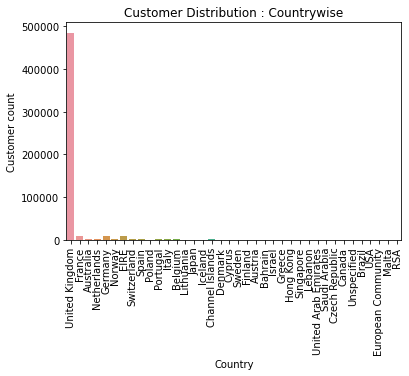

In [8]:
sns.countplot(x=df["Country"])
plt.xticks(rotation ='vertical')
plt.title("Customer Distribution : Countrywise")
plt.xlabel("Country")
plt.ylabel("Customer count")

plt.show()

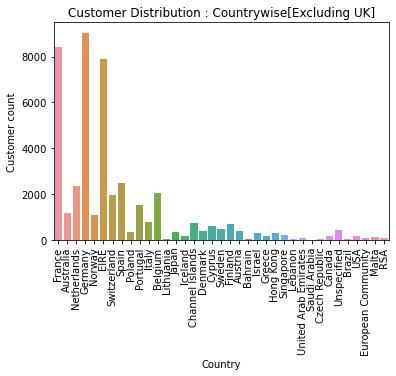

In [9]:

df1= df[df['Country']!="United Kingdom"]
sns.countplot(x=df1["Country"])
plt.xticks(rotation ='vertical')
plt.title("Customer Distribution : Countrywise[Excluding UK]")
plt.xlabel("Country")
plt.ylabel("Customer count")

plt.show()

##### Germany has the most number of customers (after United Kingdom)

**Total Number of Countries** : 'United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'

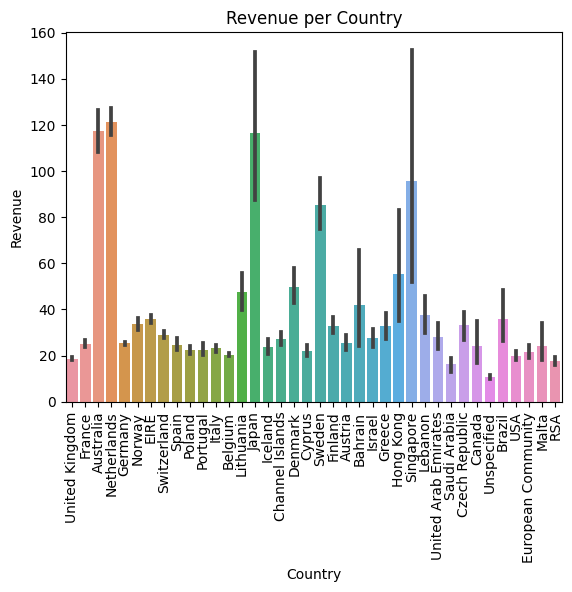

In [10]:
sns.barplot(x=df["Country"],y=df["revenue"])
plt.xticks(rotation ='vertical')
plt.title("Revenue per Country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()

In [10]:
print("HIGH REVENUE COUNTRIES : ")
df2= df[(df['Country']!='Iceland')&(df['Country']!='Channel Islands')&(df['Country']!='Cyprus')&(df['Country']!='Finland')&(df['Country']!='Austria')&(df['Country']!='Bahrain')&(df['Country']!='Israel')&(df['Country']!='Greece')&(df['Country']!='Italy')&(df['Country']!='Belgium')&(df['Country']!='Lebanon')&(df['Country']!='United Arab Emirates')&(df['Country']!='Saudi Arabia')&(df['Country']!='Czech Republic')&(df['Country']!='Canada')&(df['Country']!='Unspecified')&(df['Country']!='Brazil')&(df['Country']!='USA')&(df['Country']!='European Community')&(df['Country']!='European Community')& (df['Country']!='Malta') & (df['Country']!='RSA')]
df2["Country"].unique()

HIGH REVENUE COUNTRIES : 


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Lithuania', 'Japan', 'Denmark', 'Sweden', 'Hong Kong',
       'Singapore'], dtype=object)

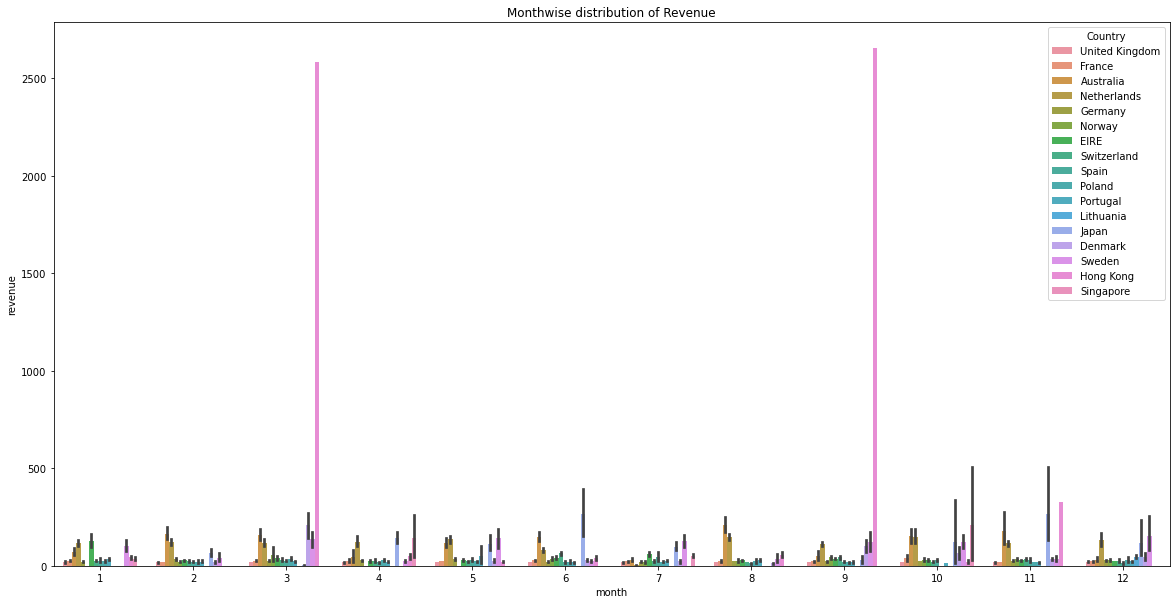

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x=df2["month"],y=df2["revenue"],hue=df2["Country"])
plt.title("Monthwise distribution of Revenue")

plt.show()

### Products that are sold in very huge quantity

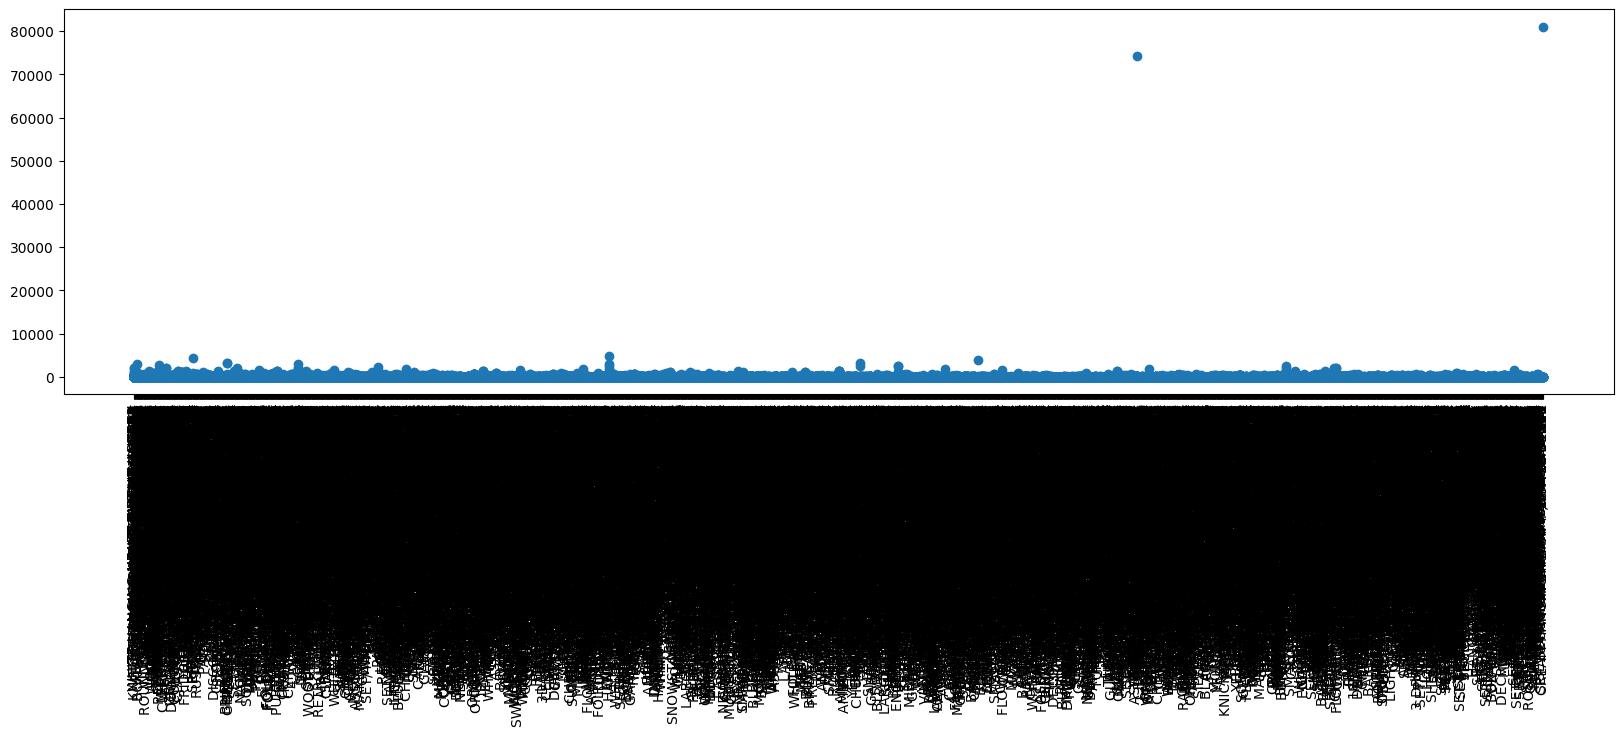

In [13]:
plt.figure(figsize=(20,5))
plt.scatter(df['Description'],df["Quantity"])
plt.xticks(rotation ='vertical')
plt.show()

In [14]:
df_HighQ= df[df['Quantity']>60000]
print(df_HighQ["Description"])

61619     MEDIUM CERAMIC TOP STORAGE JAR
540421       PAPER CRAFT , LITTLE BIRDIE
Name: Description, dtype: object


##### The following products are bought at a high quantity : 
- MEDIUM CERAMIC TOP STORAGE JAR 
- PAPER CRAFT 
- LITTLE BIRDIE

### Which items earns most revenue?

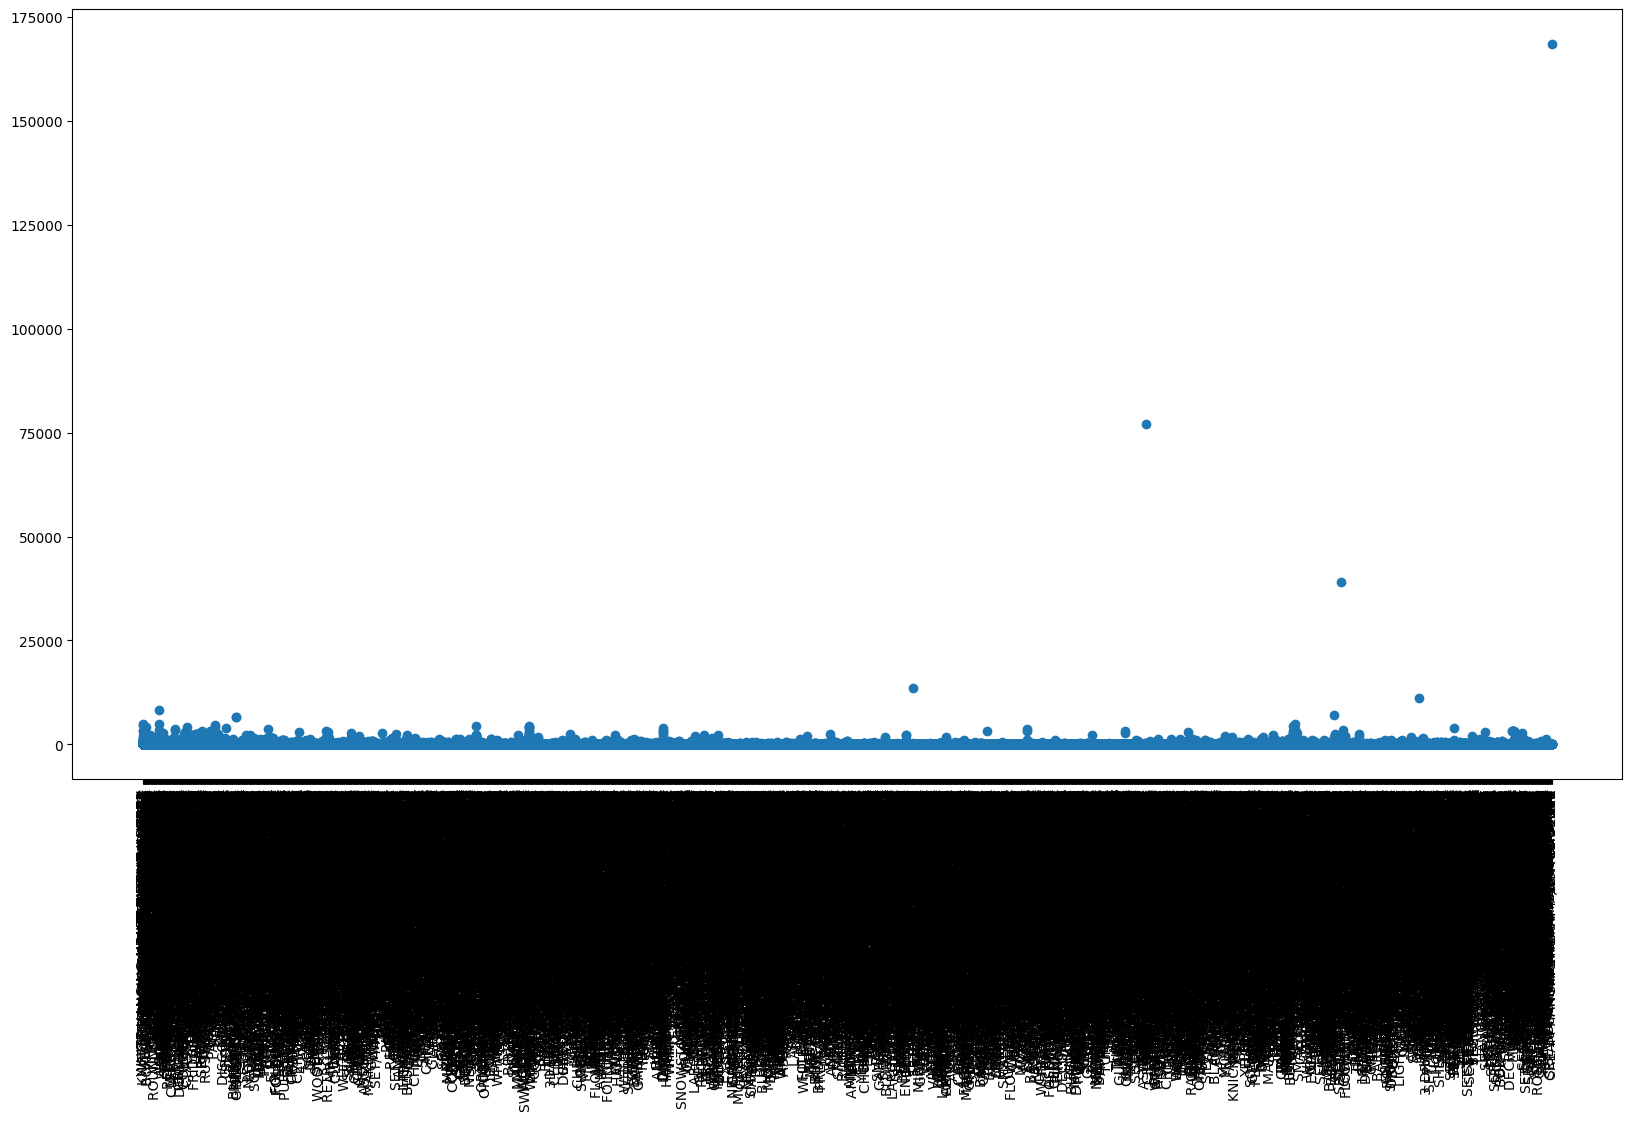

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(df['Description'],df["revenue"])
plt.xticks(rotation ='vertical')
plt.show()

In [16]:
df_HighR= df[df['revenue']>25000]

print(df_HighR["Description"])
print(df_HighR["revenue"])



61619     MEDIUM CERAMIC TOP STORAGE JAR
222680    PICNIC BASKET WICKER 60 PIECES
540421       PAPER CRAFT , LITTLE BIRDIE
Name: Description, dtype: object
61619      77183.6
222680     38970.0
540421    168469.6
Name: revenue, dtype: float64


##### The following products earn the most revenue : 
- MEDIUM CERAMIC TOP STORAGE JAR (77183.6)
- PICNIC BASKET WICKER (38970.0) 
- PAPER CRAFT,LITTLE BIRDIE(168469.6)

### how does unit price affect sale?

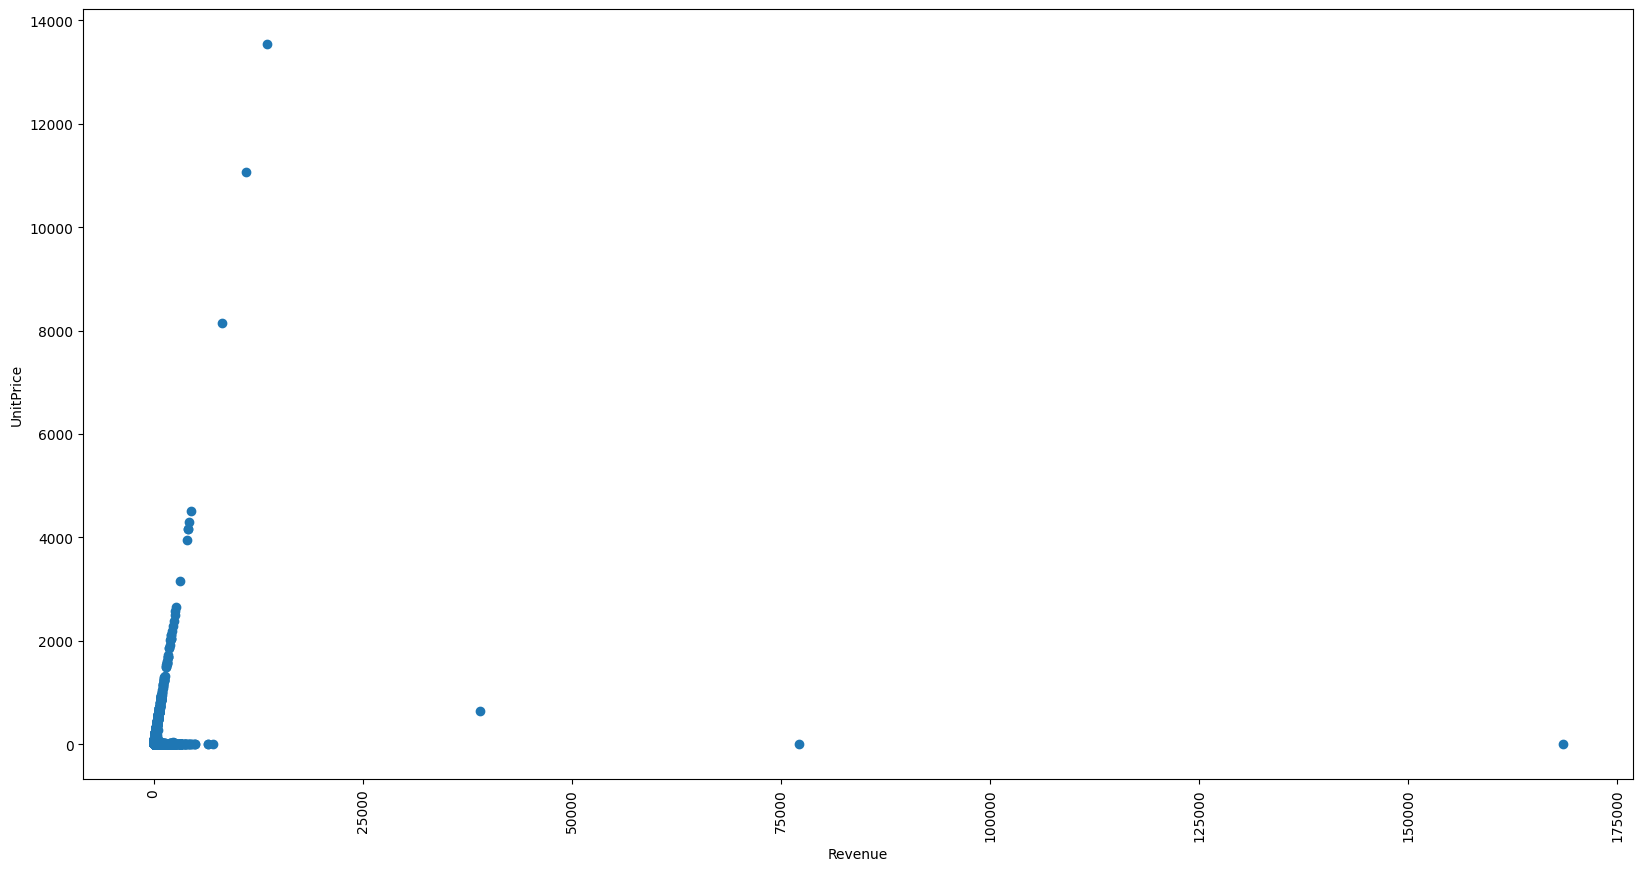

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(df['revenue'],df["UnitPrice"])
plt.xlabel("Revenue")
plt.ylabel("UnitPrice")
plt.xticks(rotation ='vertical')
plt.show()

#### Inference: lower unit price has higher revenue

### which month had the most sales?


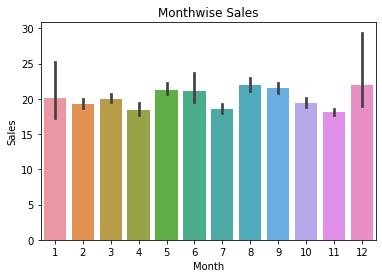

In [14]:
df["Sales"] = df["UnitPrice"]*df["Quantity"]
new_df = df
new_df['Month'] = pd.DatetimeIndex(new_df['InvoiceDate']).month
sns.barplot(x=new_df["Month"],y=new_df["Sales"])
plt.title("Monthwise Sales")
plt.show()

##### Roughly the month of December has the most sales 
probable inference : Month of Christmas and New Year Sales 

### are monthly customers or one time buyers make more revenue?


In [19]:
new_df = new_df.groupby(['CustomerID','month']).agg({'spent': sum}).reset_index()

new_df.head(20)

,CustomerID,month,spent
0,12346.0,1,77183.60
1,12347.0,1,475.39
2,12347.0,2,584.91
3,12347.0,7,1572.86
4,12347.0,9,382.52
5,12347.0,10,1294.32
6,12348.0,1,227.44
7,12348.0,5,367.00
8,12348.0,9,310.00
9,12348.0,12,892.80


#### Give inference (not sure)

### corelation between unit price and sales quantity.

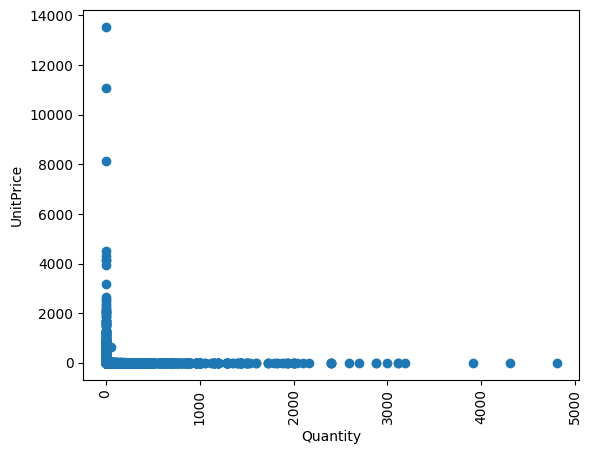

In [20]:
cdf=df[df["Quantity"]<70000]
plt.scatter(cdf['Quantity'],cdf["UnitPrice"])
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.xticks(rotation ='vertical')
plt.show()

In [21]:
df["UnitPrice"].min()

0.001

##### Inference : The quantity and unit price of a product are inversely proportional 

### Identify the products are sold frequently

In [22]:
df['Quantity'].groupby(df['Description']).agg('count').sort_values(ascending = False)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
                                      ... 
BAKING MOULD TOFFEE CUP  CHOCOLATE       1
BAKING MOULD CUPCAKE CHOCOLATE           1
WATERING CAN SINGLE HOOK PISTACHIO       1
LUNCH BAG RED SPOTTY                     1
HAPPY BIRTHDAY CARD TEDDY/CAKE           1
Name: Quantity, Length: 4026, dtype: int64

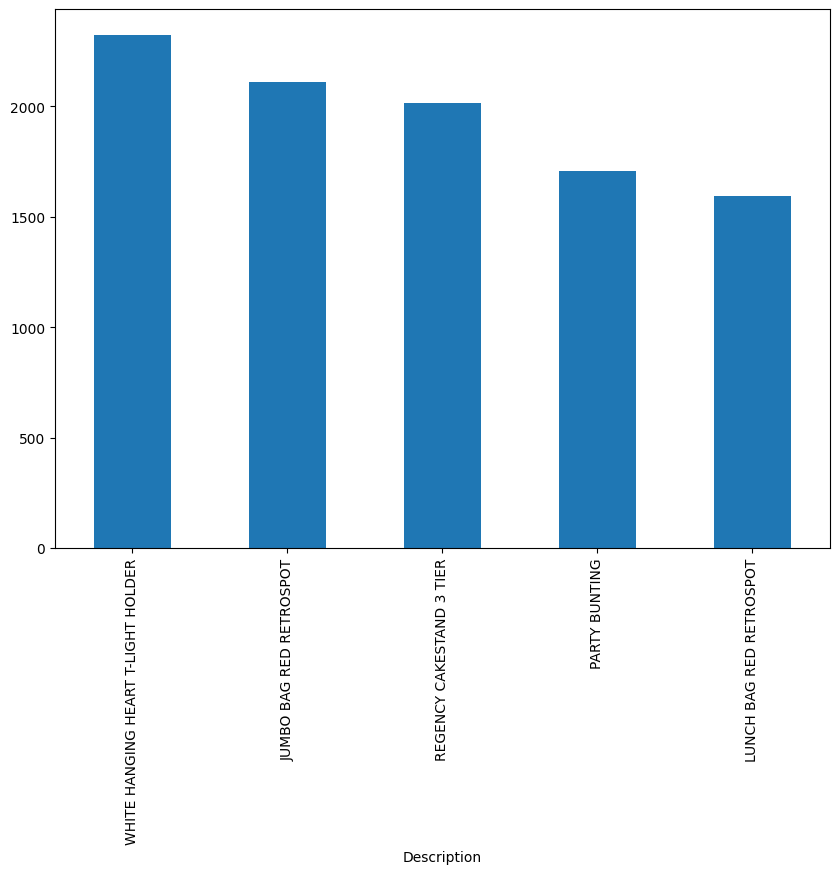

In [23]:
df1 = df[['Description','Quantity','month']]
#df1['Quantity'].groupby(df1['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

df1['month'].groupby(df1['Description']).agg('count').sort_values(ascending = False).head(5).plot.bar(figsize = (10,7))
plt.title("Products Sold Frequently")
plt.show()

##### Inference : The following products are sold frequently : 
- WHITE HANGING HEART T-LIGHT HOLDER    
- REGENCY CAKESTAND 3 TIER              
- JUMBO BAG RED RETROSPOT               
- PARTY BUNTING                         
- LUNCH BAG RED RETROSPOT               

### Who are the customers who has bought the highest and the least number of products.


In [24]:
# show the min and max quantites has sold. 
print('The minimum number of products has been bought is {} by customer id {} '.format(df['Quantity'].min(),df['Quantity'].argmin()))
print('The maximum number of products has been bought is {} by customer id {} '.format(df['Quantity'].max(),df['Quantity'].argmax()))

The minimum number of products has been bought is 1 by customer id 113 
The maximum number of products has been bought is 80995 by customer id 528623 


### What is the sales' average of each customer and what is the average of products have been sold at each country

In [25]:
df_1=df[['StockCode','Description','Quantity','Total_Amount','Country','InvoiceDate']]
Avgsales_product = df_1.groupby(['StockCode','Description']).mean()
Avgsales_product = Avgsales_product[ (Avgsales_product['Quantity'] > 0) & (Avgsales_product['Total_Amount'] >0) ]
Avgsales_product = Avgsales_product[Avgsales_product['Total_Amount'] >= 100 ]
Avgsales_product.sort_values('Total_Amount',ascending=False)

,,Quantity,Total_Amount
StockCode,Description,,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995.000000,168469.600000
22502,PICNIC BASKET WICKER 60 PIECES,30.500000,19809.750000
B,Adjust bad debt,1.000000,11062.060000
AMAZONFEE,AMAZON FEE,1.000000,6880.545000
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
23131,MISELTOE HEART WREATH CREAM,240.000000,996.000000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
22275,WEEKEND BAG VINTAGE ROSE PAISLEY,69.000000,527.850000
22833,HALL CABINET WITH 3 DRAWERS,15.200000,520.706000


### No. of invoice by grouping year and month

C:\Users\puray\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


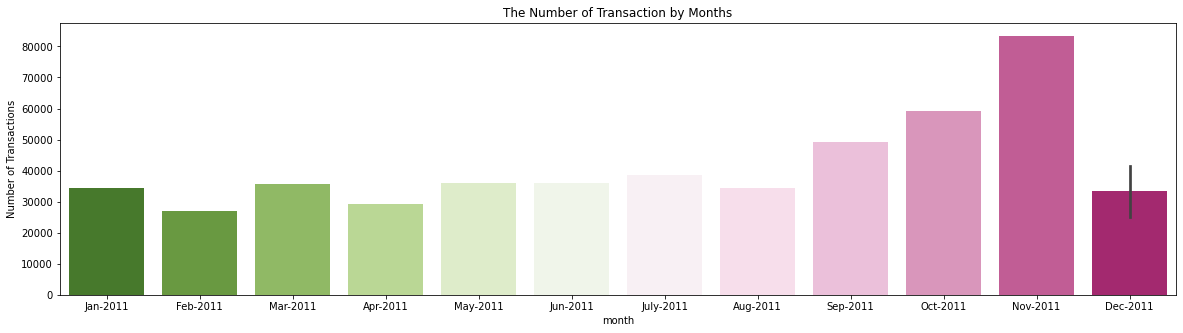

In [15]:
df_2=df.groupby(['month','Year'], as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(20,5))
sns.barplot(df_2.month, df_2.InvoiceNo, palette="PiYG_r")
plt.ylabel("Number of Transactions")
plt.title("The Number of Transaction by Months")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan-2011','Feb-2011','Mar-2011','Apr-2011','May-2011','Jun-2011','July-2011','Aug-2011','Sep-2011','Oct-2011','Nov-2011','Dec-2011']);

### No. of transactions by days

In [27]:
df_2=df.groupby(['Day'], as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(20,5))
sns.barplot(df_2.Day, df_2.InvoiceNo, palette="PiYG_r")
plt.ylabel("Number of Transactions")
plt.title("The Number of Transaction by Days")
plt.xticks([1,2,3,4,5,6,7],['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

C:\anakondafolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### TOP 5 customers with higher number of orders

In [28]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders['CustomerID'] = orders['CustomerID'].astype('int64')
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4018,17841,United Kingdom,7847
1887,14911,EIRE,5675
1297,14096,United Kingdom,5111
334,12748,United Kingdom,4595
1669,14606,United Kingdom,2700


### How much money spent by the customers?

In [ ]:
df['Amount_Spent'] = df['Quantity'] * df['UnitPrice']
df['Amount_Spent']

### TOP 5 customers with highest money spent

In [29]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()
money_spent.sort_values(by='Amount_Spent', ascending=False).head()

KeyError: 'Column not found: Amount_Spent'

### How much money spent by each country?

In [ ]:
group_country_amount_spent = df.groupby('Country')['Total_Amount'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

### Which country has improved the most in sales?

In [17]:
#calculating percent sales of 2010 
df1=df[df['Year'] == 2010]
df1.head()
total = sum(df1['Quantity'].groupby(df1['Country']).agg('sum'))
percent = ((df1['Quantity'].groupby(df1['Country']).agg('sum'))/total)*100
#percent
df1=df[df['Year'] == 2011]
total = sum(df1['Quantity'].groupby(df1['Country']).agg('sum'))
percent1 = ((df1['Quantity'].groupby(df1['Country']).agg('sum'))/total)*100
#percent1
percent3 = percent1 - percent
percent3.sort_values(ascending=False)

Country
Netherlands             1.805423
Australia               1.465563
EIRE                    1.097963
France                  0.659638
Switzerland             0.373329
Spain                   0.276390
Germany                 0.234864
Channel Islands         0.157703
Austria                 0.078170
Italy                   0.067371
Poland                  0.028803
Denmark                 0.022423
Portugal                0.018182
Bahrain                -0.010060
Iceland                -0.047893
Belgium                -0.077719
Cyprus                 -0.151153
Finland                -0.168353
Sweden                 -0.486237
Norway                 -0.695834
Japan                  -0.720106
United Kingdom         -4.297655
Brazil                       NaN
Canada                       NaN
Czech Republic               NaN
European Community           NaN
Greece                       NaN
Hong Kong                    NaN
Israel                       NaN
Lebanon                      NaN
Li

##### Netherlands improved the most with - 1.80% improvement 

### Top countries for sales as of 2010

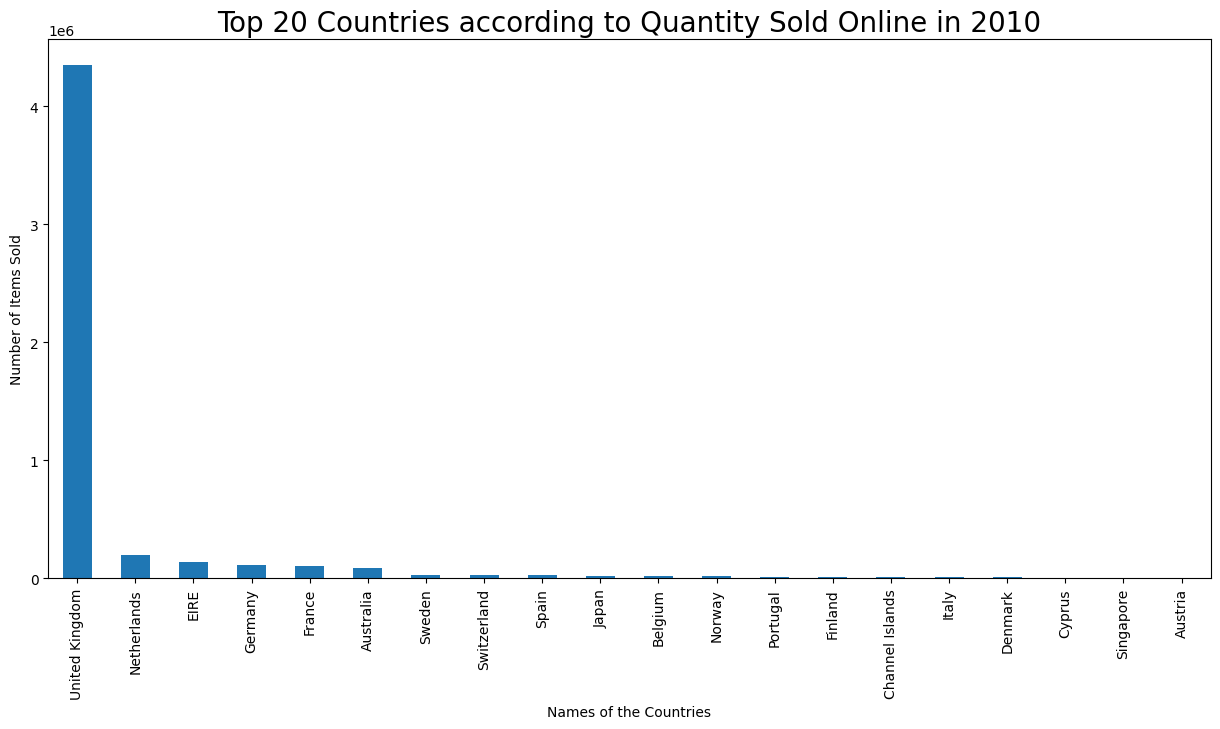

In [38]:
df1['Quantity'].groupby(df1['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

plt.title('Top 20 Countries according to Quantity Sold Online in 2010', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

### Find the bottom 20 Countries in terms of quantity of products sold

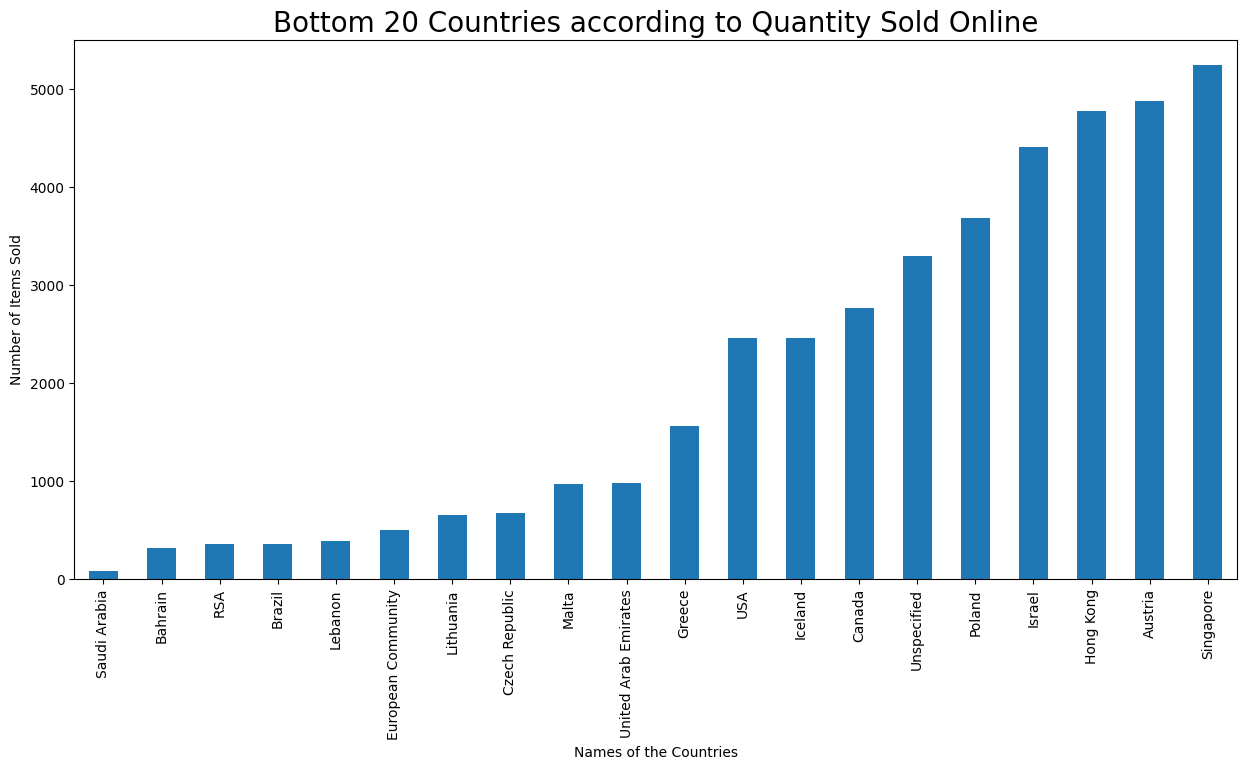

In [39]:
# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

### List out the Least bought products `

In [44]:
retail_uk = df[df['Country']=='United Kingdom']

In [45]:

print("    Least bought products ")

groupedProduct = retail_uk.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=True)
groupedProduct.drop(groupedProduct[groupedProduct['Quantity'] < 0].index, inplace = True)
groupedProduct.head(20)

    Least bought products 


,Description,Quantity
472,BLUE PADDED SOFT MOBILE,1
1490,GOLD COSMETICS BAG WITH BUTTERFLY,1
431,BLUE CRYSTAL BOOT PHONE CHARM,1
597,CAKE STAND LACE WHITE,1
3560,TINY CRYSTAL BRACELET RED,1
292,BAROQUE BUTTERFLY EARRINGS RED,1
3872,WIRE FLOWER T-LIGHT HOLDER,1
872,COUNTRY COTTAGE DOORSTOP GREEN,1
1293,FLOWER SHOP DESIGN MUG,1
439,BLUE DROP EARRINGS W BEAD CLUSTER,1


### CUSTOMER SEGMENTATION

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Original_df = pd.read_csv("Online_Retail.csv",parse_dates=['InvoiceDate'])
Original_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [6]:
Original_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
Original_df["spent"] = Original_df["UnitPrice"]*Original_df["Quantity"]
Original_df = Original_df[(Original_df['spent']>0)]

In [8]:
Original_df.shape

(530104, 9)

In [9]:
print("latest: ",Original_df["InvoiceDate"].max())
print("oldest: ",Original_df["InvoiceDate"].min())

latest:  2011-12-10 17:19:00
oldest:  2010-01-12 08:26:00


12 jan 2010 - 12 sept 2011

In [10]:
mask = (Original_df['InvoiceDate'] <= '2011-12-09') & (Original_df['InvoiceDate'] >= '2010-12-09')
df = Original_df.loc[mask]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spent
25281,538365,22469,HEART OF WICKER SMALL,8,2010-12-12 10:11:00,1.65,17243.0,United Kingdom,13.20
25282,538365,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2010-12-12 10:11:00,4.25,17243.0,United Kingdom,4.25
25283,538365,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-12-12 10:11:00,4.95,17243.0,United Kingdom,14.85
25284,538365,22835,HOT WATER BOTTLE I AM SO POORLY,5,2010-12-12 10:11:00,4.65,17243.0,United Kingdom,23.25
25285,538365,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2010-12-12 10:11:00,3.75,17243.0,United Kingdom,15.00


In [11]:
df.shape

(501748, 9)

In [12]:
customerdf = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (x.max() - x.min()).days,
                                                                   'InvoiceNo': lambda x: len(x),
                                                                   'spent': lambda x: sum(x)})
customerdf.columns = ["Lifespan","Frequency","TotalSales"]
customerdf.head()

,Lifespan,Frequency,TotalSales
CustomerID,,,
12346.0,0,1,77183.60
12347.0,277,151,3598.21
12348.0,282,31,1797.24
12349.0,0,73,1757.55
12350.0,0,17,334.40


### Customer Lifetime Value = (Customer Value * Average Customer Lifespan)

### where Customer Value = Average Purchase Value * Average Number of Purchases

In [13]:
customerdf["avgPurchaseValue"]=customerdf["TotalSales"]/customerdf["Frequency"]
customerdf.head()

,Lifespan,Frequency,TotalSales,avgPurchaseValue
CustomerID,,,,
12346.0,0,1,77183.60,77183.600000
12347.0,277,151,3598.21,23.829205
12348.0,282,31,1797.24,57.975484
12349.0,0,73,1757.55,24.076027
12350.0,0,17,334.40,19.670588


In [14]:
customerdf.shape

(4246, 4)

#### Constants

In [15]:
# total no.of purchases / total no.of customers
# avgPurchaseFrequencyRate = len(df. index)/len(customerdf. index)
avgPurchaseFrequencyRate = customerdf["Frequency"].sum()/len(customerdf. index)
avgPurchaseFrequencyRate

89.2880357983985

In [16]:
customerdf.head()

,Lifespan,Frequency,TotalSales,avgPurchaseValue
CustomerID,,,,
12346.0,0,1,77183.60,77183.600000
12347.0,277,151,3598.21,23.829205
12348.0,282,31,1797.24,57.975484
12349.0,0,73,1757.55,24.076027
12350.0,0,17,334.40,19.670588


In [17]:
ACL = customerdf["Lifespan"].sum()/len(customerdf. index)
ACL

124.6267074894018

### Customer Value

In [18]:
customerdf["CV"]=customerdf["avgPurchaseValue"]*avgPurchaseFrequencyRate
customerdf.head()

,Lifespan,Frequency,TotalSales,avgPurchaseValue,CV
CustomerID,,,,,
12346.0,0,1,77183.60,77183.600000,6.891572e+06
12347.0,277,151,3598.21,23.829205,2.127663e+03
12348.0,282,31,1797.24,57.975484,5.176517e+03
12349.0,0,73,1757.55,24.076027,2.149701e+03
12350.0,0,17,334.40,19.670588,1.756348e+03


### Customer Lifetime Value

In [19]:
customerdf["CLV"]=customerdf["CV"]*ACL
customerdf.head()

,Lifespan,Frequency,TotalSales,avgPurchaseValue,CV,CLV
CustomerID,,,,,,
12346.0,0,1,77183.60,77183.600000,6.891572e+06,8.588739e+08
12347.0,277,151,3598.21,23.829205,2.127663e+03,2.651636e+05
12348.0,282,31,1797.24,57.975484,5.176517e+03,6.451323e+05
12349.0,0,73,1757.55,24.076027,2.149701e+03,2.679102e+05
12350.0,0,17,334.40,19.670588,1.756348e+03,2.188879e+05


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customerdf[['CLV']] = scaler.fit_transform(customerdf[['CLV']])
customerdf.head()

,Lifespan,Frequency,TotalSales,avgPurchaseValue,CV,CLV
CustomerID,,,,,,
12346.0,0,1,77183.60,77183.600000,6.891572e+06,1.000000
12347.0,277,151,3598.21,23.829205,2.127663e+03,0.000282
12348.0,282,31,1797.24,57.975484,5.176517e+03,0.000724
12349.0,0,73,1757.55,24.076027,2.149701e+03,0.000285
12350.0,0,17,334.40,19.670588,1.756348e+03,0.000228


#### Insights stuff 
- Product Segmentation 
- Check on increase of CLV over 2010 to 2011 
- 

### Customer Segmentation 

In [108]:
dup_df = Original_df.copy()
dup_df=dup_df[dup_df.Country=='United Kingdom']

In [109]:
# Convert to show date only
from datetime import datetime
dup_df["InvoiceDate"] = dup_df["InvoiceDate"].dt.date

# Create TotalSum colummn
dup_df["TotalSum"] = dup_df["Quantity"] * dup_df["UnitPrice"]

# Create date variable that records recency
import datetime
snapshot_date = max(dup_df.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = dup_df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'Monetary'}, inplace=True)

In [110]:
customers.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,1,77183.60
12747.0,24,103,4196.01
12748.0,6,4595,33719.73
12749.0,24,199,4090.88
12820.0,46,59,942.34


Customers with **lowest recency value** and **highest frequency & monetary** to be considered as Best customer .

To assign score : using **Quantile Statistical Technique** 
- **Quantile Statistical Technique**: Basically, this technique allocates every value to be in 1,2,3,4 quartile. 
- Computing quantile of rfm value for segmentation 


In [111]:
customers['r_quartile'] = pd.qcut(customers['Recency'], 4, ['1','2','3','4'])
customers['f_quartile'] = pd.qcut(customers['Frequency'], 4, ['4','3','2','1'])
customers['m_quartile'] = pd.qcut(customers['Monetary'], 4, ['4','3','2','1'])
customers.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,327,1,77183.60,4,4,1
12747.0,24,103,4196.01,2,1,1
12748.0,6,4595,33719.73,1,1,1
12749.0,24,199,4090.88,2,1,1
12820.0,46,59,942.34,2,2,2


In [112]:
#### Combine RFM Quantile score
customers['RFM_Score'] = customers.r_quartile.astype(str)+ customers.f_quartile.astype(str) + customers.m_quartile.astype(str)
customers.head()


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,327,1,77183.60,4,4,1,441
12747.0,24,103,4196.01,2,1,1,211
12748.0,6,4595,33719.73,1,1,1,111
12749.0,24,199,4090.88,2,1,1,211
12820.0,46,59,942.34,2,2,2,222


In [113]:
    # Filter out Top/Best customers as (111)
customers[customers['RFM_Score']=='111'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,13,431,259657.30,1,1,1,111
17450.0,4,337,194550.79,1,1,1,111
17511.0,7,963,91062.38,1,1,1,111
16684.0,13,277,66653.56,1,1,1,111
14096.0,13,5111,65164.79,1,1,1,111


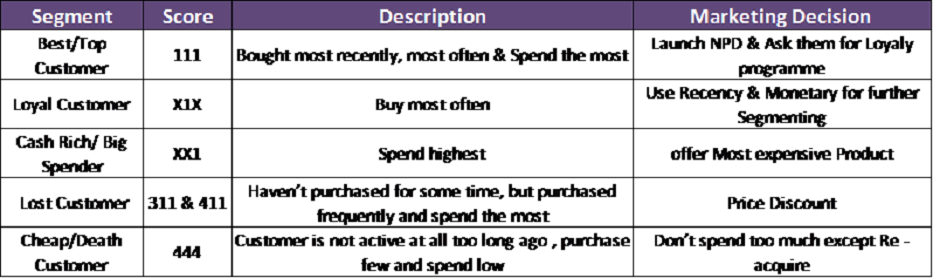

In [121]:
customers.loc[customers['f_quartile']== '1',"Segment"] = 'LOYAL CUSTOMER'
customers.loc[customers['m_quartile']== '1',"Segment"] = 'RICH CUSTOMER'
customers.loc[customers['RFM_Score']== '111', "Segment"] = 'TOP CUSTOMER'
customers.loc[customers['RFM_Score']== '444',"Segment"] = 'CHEAP CUSTOMER'
customers.loc[customers['RFM_Score']== '311',"Segment"] = 'LOST CUSTOMER'
customers.loc[customers['RFM_Score']== '411',"Segment"] = 'LOST CUSTOMER'

customers['Segment'] = customers['Segment'].fillna('other')
#customers.drop(['Segement'], axis=1)
customers.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Segment,CustomerID_col
CustomerID,,,,,,,,,
12346.0,327,1,77183.60,4,4,1,441,RICH CUSTOMER,12346.0
12747.0,24,103,4196.01,2,1,1,211,RICH CUSTOMER,12747.0
12748.0,6,4595,33719.73,1,1,1,111,TOP CUSTOMER,12748.0
12749.0,24,199,4090.88,2,1,1,211,RICH CUSTOMER,12749.0
12820.0,46,59,942.34,2,2,2,222,other,12820.0


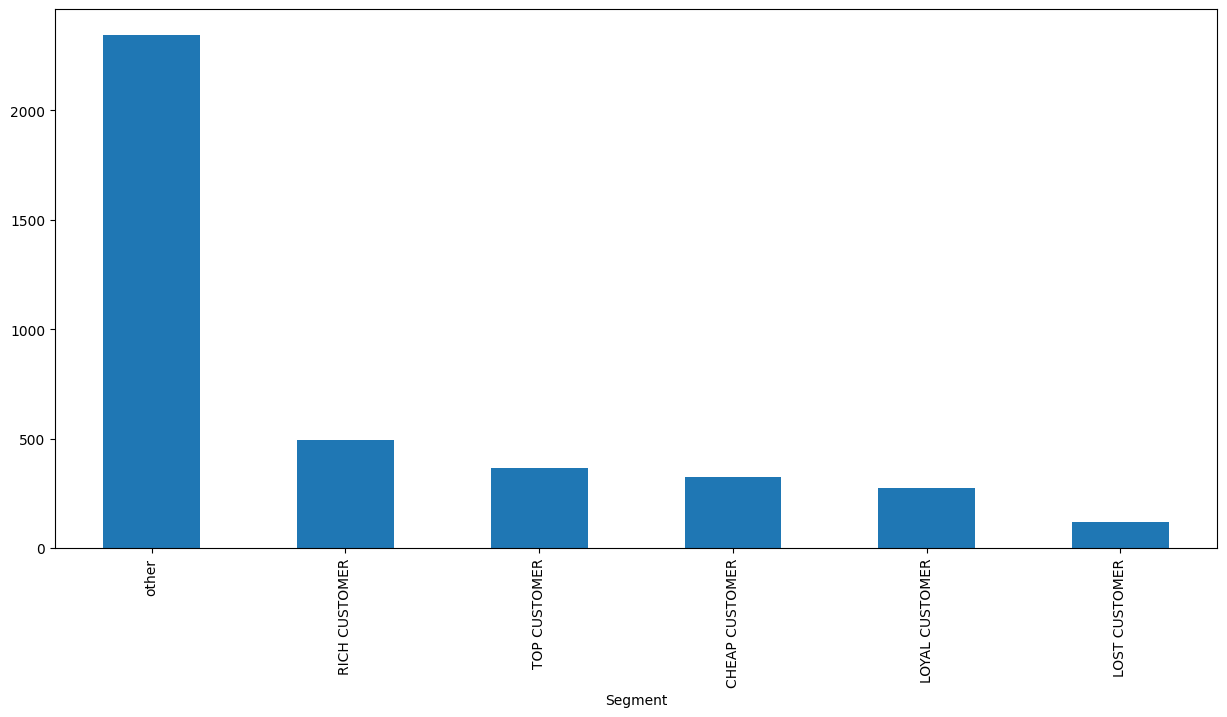

In [122]:
customers['CustomerID_col'] = customers.index 
customers['CustomerID_col'].groupby(customers['Segment']).agg('count').sort_values(ascending = False).plot.bar(figsize = (15, 7))
plt.show()

In [128]:
customers['CustomerID_col'].groupby(customers['Segment']).agg('count').sort_values(ascending = False)

Segment
other             2344
RICH CUSTOMER      493
TOP CUSTOMER       366
CHEAP CUSTOMER     323
LOYAL CUSTOMER     273
LOST CUSTOMER      121
Name: CustomerID_col, dtype: int64

In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
df["spent"] = df["UnitPrice"]*df["Quantity"]
df = df[(df['spent']>0)]

In [5]:
df.shape

(530104, 9)

In [6]:
customerdf = df.groupby('CustomerID').agg({
                                           'InvoiceDate':lambda x: (x.max() - x.min()).days,
                                           'InvoiceNo': lambda x: len(x),
                                           'spent': lambda x: sum(x)})
customerdf.columns = ["Lifespan","Frequency","TotalSales"]
customerdf.head()

,Lifespan,Frequency,TotalSales
CustomerID,,,
12346.0,0,1,77183.60
12347.0,365,182,4310.00
12348.0,282,31,1797.24
12349.0,0,73,1757.55
12350.0,0,17,334.40


In [7]:
import datetime
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)
customerdf["recency"] = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days})
customerdf.head()

,Lifespan,Frequency,TotalSales,recency
CustomerID,,,,
12346.0,0,1,77183.60,325
12347.0,365,182,4310.00,3
12348.0,282,31,1797.24,75
12349.0,0,73,1757.55,18
12350.0,0,17,334.40,311


### Customer Lifetime Value = (Customer Value * Average Customer Lifespan)

### where Customer Value = Average Purchase Value * Average Number of Purchases

In [8]:
customerdf["avgPurchaseValue"]=customerdf["TotalSales"]/customerdf["Frequency"]
customerdf.head()

,Lifespan,Frequency,TotalSales,recency,avgPurchaseValue
CustomerID,,,,,
12346.0,0,1,77183.60,325,77183.600000
12347.0,365,182,4310.00,3,23.681319
12348.0,282,31,1797.24,75,57.975484
12349.0,0,73,1757.55,18,24.076027
12350.0,0,17,334.40,311,19.670588


In [9]:
customerdf.shape

(4338, 5)

#### Constants

In [10]:
avgPurchaseFrequencyRate = len(df. index)/len(customerdf. index)
#avgPurchaseFrequencyRate = customerdf["Frequency"].sum()/len(customerdf. index)
avgPurchaseFrequencyRate

122.20009220839097

In [11]:
ACL = customerdf["Lifespan"].sum()/len(customerdf. index)
ACL

130.54241585984326

### Customer Value

In [12]:
customerdf["CV"]=customerdf["avgPurchaseValue"]*avgPurchaseFrequencyRate
customerdf.head()

,Lifespan,Frequency,TotalSales,recency,avgPurchaseValue,CV
CustomerID,,,,,,
12346.0,0,1,77183.60,325,77183.600000,9.431843e+06
12347.0,365,182,4310.00,3,23.681319,2.893859e+03
12348.0,282,31,1797.24,75,57.975484,7.084609e+03
12349.0,0,73,1757.55,18,24.076027,2.942093e+03
12350.0,0,17,334.40,311,19.670588,2.403748e+03


### Customer Lifetime Value

In [13]:
customerdf["CLV"]=customerdf["CV"]*ACL
customerdf.head()

,Lifespan,Frequency,TotalSales,recency,avgPurchaseValue,CV,CLV
CustomerID,,,,,,,
12346.0,0,1,77183.60,325,77183.600000,9.431843e+06,1.231256e+09
12347.0,365,182,4310.00,3,23.681319,2.893859e+03,3.777714e+05
12348.0,282,31,1797.24,75,57.975484,7.084609e+03,9.248420e+05
12349.0,0,73,1757.55,18,24.076027,2.942093e+03,3.840679e+05
12350.0,0,17,334.40,311,19.670588,2.403748e+03,3.137910e+05


In [14]:
final_df = customerdf.sort_values(by=['Frequency'],ascending=False)
final_df.head(20)

,Lifespan,Frequency,TotalSales,recency,avgPurchaseValue,CV,CLV
CustomerID,,,,,,,
17841.0,372,7847,40991.57,2,5.223852,638.355248,8.333244e+04
14911.0,372,5675,143825.06,2,25.343623,3096.993056,4.042890e+05
14096.0,96,5111,65164.79,5,12.749910,1558.040177,2.033903e+05
12748.0,373,4595,33719.73,1,7.338353,896.747359,1.170636e+05
14606.0,372,2700,12156.65,2,4.502463,550.201389,7.182462e+04
15311.0,373,2379,60767.90,1,25.543464,3121.413612,4.074769e+05
14646.0,352,2076,280206.02,2,134.973998,16493.835010,2.153145e+06
13089.0,367,1818,58825.83,3,32.357442,3954.082426,5.161755e+05
13263.0,323,1677,7454.07,2,4.444884,543.165201,7.090610e+04


## Automate from here

In [15]:
def data_preprocessor(cids):
    dfs=[]
    for cid in cids:
        best_customer = df.loc[df['CustomerID'] == cid]
        best_customer = best_customer.drop(["InvoiceNo","StockCode","Description","Country"],axis = 1)
        best_customer["frequency"] = np.arange(1,1+len(best_customer.index))
        best_customer['TotalSales']=best_customer['spent'].cumsum()
        best_customer['avgPurchaseValue']=best_customer['TotalSales']/best_customer['frequency']
        best_customer["CV"]=best_customer["avgPurchaseValue"]*avgPurchaseFrequencyRate
        best_customer["CLV"]=best_customer["CV"]*ACL
        best_customer= best_customer.groupby('InvoiceDate').agg({'frequency': lambda x: x.sum(),
                                                                'CV': lambda x: x.sum(),
                                                               'CLV': lambda x: x.sum(),
                                                               'TotalSales': lambda x: x.sum()})
        best_customer['date'] = best_customer.index
        best_customer['date'] = pd.to_datetime(best_customer["date"].dt.date)
        best_customer["recency"] = best_customer['date'].diff()
        best_customer["recency"]=best_customer["recency"]. astype(str)
        best_customer["recency"]= best_customer["recency"].str.slice(0,-4,1)
        best_customer = best_customer.iloc[1: , :]
        best_customer["recency"]=best_customer["recency"].astype(int)
        best_customer.head()
        dfs.append(best_customer)
    return dfs

In [16]:
cids=[17841.0,14606.0,13081.0]
dfs = data_preprocessor(cids)

In [24]:
def predict(best_customers):
    for best_customer in best_customers:
        X = best_customer.drop(columns=['CLV',"date"])
        Y = best_customer['CLV']
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

        algos=[RandomForestRegressor]

        for algo in algos:
            model=algo()
            model.fit(x_train,y_train)
            test_predict = model.predict(x_test)
            print(str(algo))
            print("r2 score is: ",r2_score(y_test,test_predict))

        finaldf = pd.DataFrame()
        finaldf["predicted"] = test_predict
        finaldf["actual"] = np.array(y_test)

        plt.figure(figsize=(8, 5))
        plt.plot(finaldf["predicted"],label="predicted")
        plt.plot(finaldf["actual"],label="actual")
        plt.legend()
        plt.show()

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2 score is:  0.9746734883513373


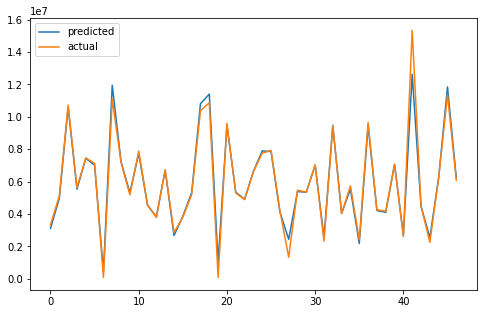

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2 score is:  0.973322188784946


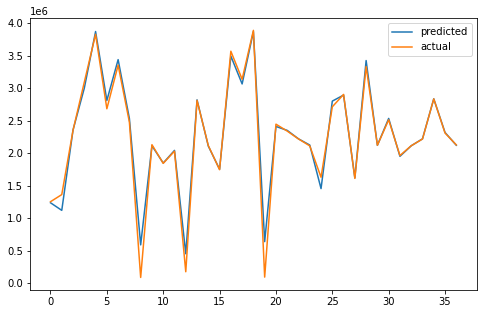

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2 score is:  0.42587825324140827


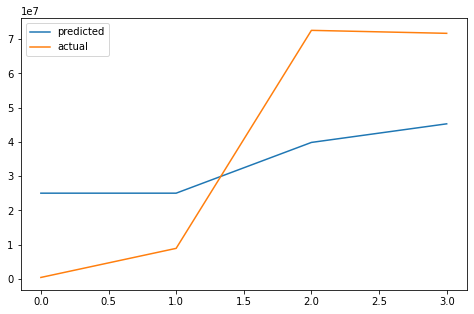

In [30]:
predict(dfs)